In [258]:
import pandas as pd
import os

In [259]:
files = os.listdir('.')

In [260]:
datafiles.reverse()

In [261]:
datafiles = [f for f in files if 'csv' in f]

In [262]:
df = pd.DataFrame()

In [263]:
for dataf in datafiles:
    df = pd.concat([df, pd.read_csv('./' + dataf)])

In [264]:
df = df.reset_index()

In [265]:
df.head()

,index,Date,Open,High,Low,Close,Volume,Adj Close
0,0,2012-07-31,23.370001,23.370001,21.610001,21.709999,56179400,21.709999
1,1,2012-07-30,24.000000,24.040001,23.030001,23.150000,29285900,23.150000
2,2,2012-07-27,23.190001,24.540001,22.280001,23.709999,123102300,23.709999
3,3,2012-07-26,27.750000,28.230000,26.730000,26.850000,64597400,26.850000
4,4,2012-07-25,28.389999,29.490000,28.080000,29.340000,17230200,29.340000


In [266]:
import datetime

import dateutil

df['Date2'] = df['Date'].apply(lambda x:dateutil.parser.parse(x))

In [267]:
df.head()

,index,Date,Open,High,Low,Close,Volume,Adj Close,Date2
0,0,2012-07-31,23.370001,23.370001,21.610001,21.709999,56179400,21.709999,2012-07-31
1,1,2012-07-30,24.000000,24.040001,23.030001,23.150000,29285900,23.150000,2012-07-30
2,2,2012-07-27,23.190001,24.540001,22.280001,23.709999,123102300,23.709999,2012-07-27
3,3,2012-07-26,27.750000,28.230000,26.730000,26.850000,64597400,26.850000,2012-07-26
4,4,2012-07-25,28.389999,29.490000,28.080000,29.340000,17230200,29.340000,2012-07-25


In [217]:
dates = pd.read_excel('FB quarterly report dates.xlsx')

In [219]:
dates.head()

,sec,Unnamed: 1,announcement,before,after
0,NaT,NaN,2017-02-01,2017-01-31,2017-02-02
1,2016-11-03,5.0,2016-11-02,2016-11-01,2016-11-03
2,2016-07-28,5.0,2016-07-27,2016-07-26,2016-07-28
3,2016-04-28,5.0,2016-04-27,2016-04-26,2016-04-28
4,2016-01-28,5.0,2016-01-27,2016-01-26,2016-01-28


In [220]:
a = dates['announcement']

In [221]:
bef = dates['before']

In [222]:
aft = dates['after']

In [109]:
a_close = []
for test_date in a:
    a_close.append(df[df['Date2'] == test_date]['Close'].tolist()[0])

In [110]:
bef_close = []
for test_date in bef:
    bef_close.append(df[df['Date2'] == test_date]['Close'].tolist()[0])

In [123]:
aft_close = []
for test_date in aft:
    try:
        aft_close.append(df[df['Date2'] == test_date]['Close'].tolist()[0])
    except:
        aft_close.append(0)

In [124]:
aft_close

[0,
 120.0,
 125.0,
 116.730003,
 109.110001,
 108.760002,
 94.139999000000003,
 82.410004000000001,
 78.0,
 74.110000999999997,
 74.980002999999996,
 56.139998999999996,
 61.479999999999997,
 48.220001000000003,
 34.360001000000004,
 28.969998999999998,
 28.110001,
 23.23,
 21.709999]

In [125]:
import matplotlib.pyplot as plt

In [126]:
%matplotlib inline

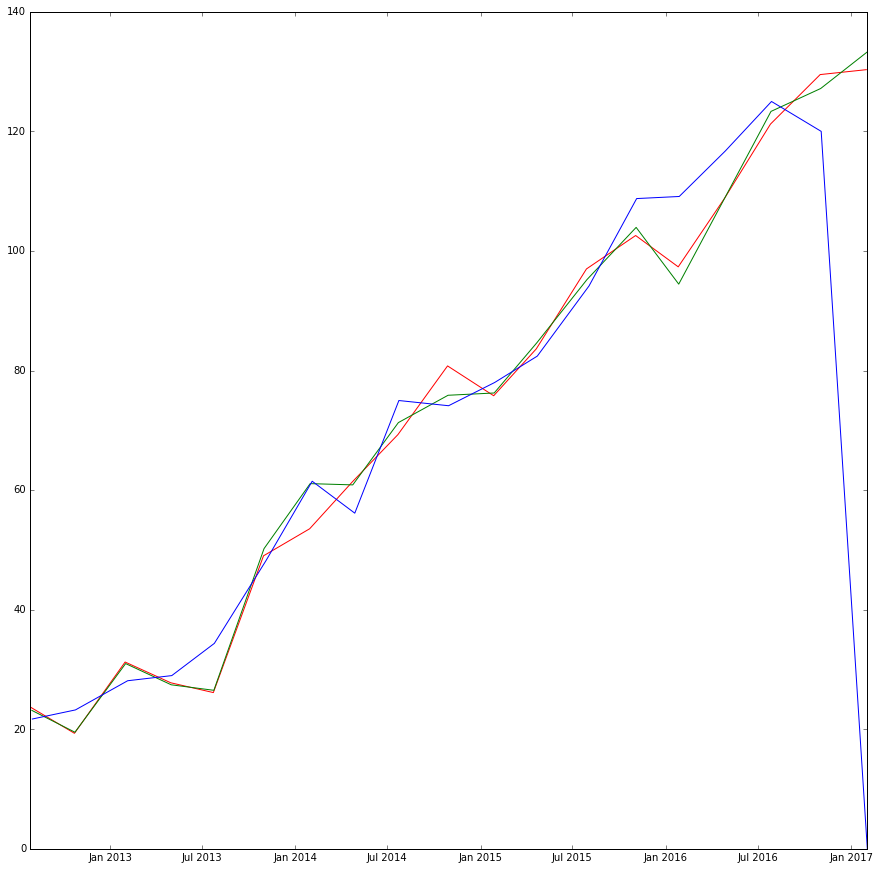

In [136]:
fig, ax = plt.subplots(1, 1, figsize=(15,15))

ax.plot(bef, bef_close, 'r')
ax.plot(a, a_close, 'g')
ax.plot(aft, aft_close, 'b')

In [138]:
zip(bef_close, a_close)

[(130.320007, 133.229996),
 (129.5, 127.16999799999999),
 (121.220001, 123.339996),
 (108.760002, 108.889999),
 (97.339995999999999, 94.449996999999996),
 (102.58000200000001, 103.94000200000001),
 (96.989998, 95.209998999999996),
 (83.620002999999997, 84.629997000000003),
 (75.779999000000004, 76.239998),
 (80.769997000000004, 75.860000999999997),
 (69.269997000000004, 71.290001000000004),
 (61.360001000000004, 60.869999),
 (53.529998999999997, 61.080002),
 (49.009997999999996, 50.209998999999996),
 (26.129998999999998, 26.510000000000002),
 (27.77, 27.43),
 (31.239999999999998, 30.98),
 (19.32, 19.5),
 (23.709999, 23.149999999999999)]

In [139]:
import numpy as np

In [140]:
np.array(bef_close) < np.array(a_close)

array([ True, False,  True,  True, False,  True, False,  True,  True,
       False,  True, False,  True,  True,  True, False, False,  True, False], dtype=bool)

In [150]:
df = pd.DataFrame([a.tolist(), bef_close, a_close, aft_close]).transpose()

In [151]:
df.head()

,0,1,2,3
0,2017-02-01 00:00:00,130.32,133.23,0
1,2016-11-02 00:00:00,129.5,127.17,120
2,2016-07-27 00:00:00,121.22,123.34,125
3,2016-04-27 00:00:00,108.76,108.89,116.73
4,2016-01-27 00:00:00,97.34,94.45,109.11


In [152]:
df.columns=['time', 'bef', 'a','aft']

In [153]:
df.head()

,time,bef,a,aft
0,2017-02-01 00:00:00,130.32,133.23,0
1,2016-11-02 00:00:00,129.5,127.17,120
2,2016-07-27 00:00:00,121.22,123.34,125
3,2016-04-27 00:00:00,108.76,108.89,116.73
4,2016-01-27 00:00:00,97.34,94.45,109.11


In [155]:
df2 = df[df['bef']<df['a']]

In [158]:
df2

,time,bef,a,aft
0,2017-02-01 00:00:00,130.32,133.23,0
2,2016-07-27 00:00:00,121.22,123.34,125
3,2016-04-27 00:00:00,108.76,108.89,116.73
5,2015-11-04 00:00:00,102.58,103.94,108.76
7,2015-04-22 00:00:00,83.62,84.63,82.41
8,2015-01-28 00:00:00,75.78,76.24,78
10,2014-07-23 00:00:00,69.27,71.29,74.98
12,2014-01-30 00:00:00,53.53,61.08,61.48
13,2013-10-31 00:00:00,49.01,50.21,48.22
14,2013-07-24 00:00:00,26.13,26.51,34.36


In [156]:
df3 = df2[df2['a']<df2['aft']]

In [157]:
df3

,time,bef,a,aft
2,2016-07-27 00:00:00,121.22,123.34,125
3,2016-04-27 00:00:00,108.76,108.89,116.73
5,2015-11-04 00:00:00,102.58,103.94,108.76
8,2015-01-28 00:00:00,75.78,76.24,78
10,2014-07-23 00:00:00,69.27,71.29,74.98
12,2014-01-30 00:00:00,53.53,61.08,61.48
14,2013-07-24 00:00:00,26.13,26.51,34.36
17,2012-10-23 00:00:00,19.32,19.5,23.23


In [159]:
len(df2)

11

In [160]:
len(df3)

8

In [164]:
a[0].weekday()

2

In [ ]:
# 2 days after annoucement

In [172]:
x = a[0]

In [180]:
# Monday is 0
# Friday is 4
# Saturday is 5
# Sunday is 6
x.weekday()

2

In [179]:
x

Timestamp('2017-02-01 00:00:00')

In [178]:
x + datetime.timedelta(days=1)

Timestamp('2017-02-02 00:00:00')

In [223]:
def add_n_day(x, n):
    xn = x + datetime.timedelta(days=n)
    if xn.weekday() == 5:
        return xn + datetime.timedelta(days=2)
    elif xn.weekday() == 6:
        return xn + datetime.timedelta(days=1)
    else:
        return xn
    

In [268]:
def cal_an_close(a, n):
    
    an = a.apply(add_n_day, n=n)
    an_close = []

    for test_date in an:
        try:
            an_close.append(df[df['Date2'] == test_date]['Close'].tolist()[0])
        except:
            an_close.append(0)
    return an_close

In [269]:
an_close = cal_an_close(a,0)

In [270]:
an_close

[133.229996,
 127.16999799999999,
 123.339996,
 108.889999,
 94.449996999999996,
 103.94000200000001,
 95.209998999999996,
 84.629997000000003,
 76.239998,
 75.860000999999997,
 71.290001000000004,
 60.869999,
 61.080002,
 50.209998999999996,
 26.510000000000002,
 27.43,
 30.98,
 19.5,
 23.149999999999999]

In [271]:
cal_an_close(a,1)

[0,
 120.0,
 125.0,
 116.730003,
 109.110001,
 108.760002,
 94.010002,
 82.410004000000001,
 78.0,
 74.110000999999997,
 74.980002999999996,
 57.709998999999996,
 62.57,
 49.75,
 34.360001000000004,
 28.969998999999998,
 29.73,
 23.23,
 21.709999]

In [304]:
df_price = pd.DataFrame([a.tolist(), cal_an_close(a,-1), a_close, cal_an_close(a,1)]).transpose()

df_price.columns = ['date','daybefore','day','dayafter']

df_price2 = df_price[df_price['daybefore']<df_price['day']]

df_price3 = df_price2[df_price2['day']<df_price2['dayafter']]

print len(df_price2), len(df_price3)

price_difference = df_price3['dayafter'] - df_price3['day']

print price_difference

print 'mean', np.array(price_difference).mean()

print 'std', np.array(price_difference).std()

11 8
2     1.66
3     7.84
5     4.82
8     1.76
10    3.69
12    1.49
14    7.85
17    3.73
dtype: object
mean 4.105001375
std 2.42679359521


In [303]:
df_price = pd.DataFrame([a.tolist(), cal_an_close(a,-1), a_close, cal_an_close(a,2)]).transpose()

df_price.columns = ['date','daybefore','day','dayafter']

df_price2 = df_price[df_price['daybefore']<df_price['day']]

df_price3 = df_price2[df_price2['day']<df_price2['dayafter']]

print len(df_price2), len(df_price3)

price_difference = df_price3['dayafter'] - df_price3['day']

print price_difference

print 'mean', np.array(price_difference).mean()

print 'std', np.array(price_difference).std()

11 7
2     0.600006
3         8.69
5         3.16
10         3.9
12    0.399998
14         7.5
17        3.06
dtype: object
mean 3.90142871429
std 2.93494419639
